In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
from datetime import timedelta
# import measures

In [56]:
sp500 = yf.Ticker('^GSPC')
# start = '2000-01-01'
start = '1972-01-01'
end = '2021-01-01'
# end = '2000-01-01'

In [57]:
sp500_p = sp500.history(start=start, end=end)

In [58]:
threshold_bull = 0.2
threshold_bear = 0.2

In [27]:
# def getTrend(df, threshold_bull, threshold_bear):
#     df = pd.DataFrame(df)
#     t0 = t_trough = t_peak = 0
#     period_max = df.iloc[t0].values[0]
#     period_min = df.iloc[t0].values[0]
#     bull = []
#     bear = []
#     indicator = True
# #     global t_trough
# #     global t_peak
    
#     for i in range(df.shape[0]):

#         cur = df.iloc[i].values[0]

#         if indicator:
#             if cur > period_max:
#                 period_max = cur
#                 t_peak = i

#             elif (period_max - cur)/period_max > threshold_bear:
#                 bull.append((t0, t_peak))
#                 t0 = t_peak
#         #         period_max = sp500_p.iloc[t_peak]
#                 period_min = cur
#                 indicator = False
#         else:
#             if cur < period_min:
#                 period_min = cur
#                 t_trough = i

#             elif (cur - period_min)/period_min > threshold_bull:
#                 bear.append((t0, t_trough))
#                 t0 = t_trough
#                 period_max = cur
#         #         period_min = sp500_p.iloc[t_trough]
#                 indicator = True

#     df['class'] = 1

#     for x in bear:
#         df.loc[df.index[x[0]:x[1]], 'class'] = 0
        
#     return df, bull, bear

In [228]:
def maxDrawdown(df):
    cummax = df.cummax()
    drawdown = cummax - df
    
    return drawdown

In [233]:
def maxRaise(df):
    cummin = df.cummin()
    raiseUp = df - cummin
    
    return raiseUp

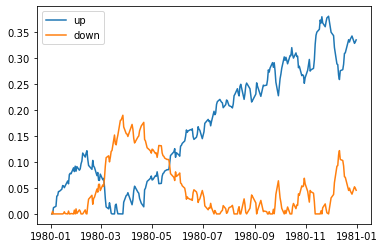

In [240]:
plt.figure()
plt.plot(maxRaise(rets['1980'].add(1).cumprod()), label='up')
plt.plot(maxDrawdown(rets['1980'].add(1).cumprod()), label='down')
plt.legend()

In [245]:
rets['1980'].std()*np.sqrt(252)

0.16467160563688693

In [235]:
raiseUp = maxRaise(rets['1980'].add(1).cumprod())
drawDown = maxDrawdown(rets['1980'].add(1).cumprod())

In [239]:
np.where(raiseUp>threshold_bear)[0][0]

137

In [246]:
df = rets['1980'].add(1).cumprod()

In [249]:
df[0]

0.9795968564935512

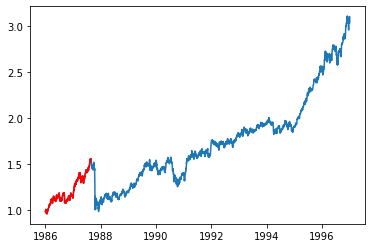

In [292]:
plt.plot(cumRet)
plt.plot(cumRet.iloc[:416], 'r')

In [293]:
def getTrend(df):
    df = pd.Series(df)
    vol = annVol(df)
    cumRet = df.add(1).cumprod()
    
    bull = []
    bear = []
    pre_max, idxmax = cumRet[0], 0
    pre_min, idxmin = cumRet[0], 0
    i0 = 0
    indicator = 1 if cumRet[1] > cumRet[0] else 0
    
    for i in range(cumRet.shape[0]):
        
        cur = cumRet[i]
        if cur > pre_max:
            pre_max = cur
            idxmax = i
        elif cur < pre_min:
            pre_min = cur
            idxmin = i
        
        drawdown = (pre_max - cur) / pre_max
        raiseUp = (cur - pre_min) / pre_min

        if (drawdown > vol) and (indicator == 1):
            bull.append((i0, idxmax))
            i0 = idxmax
            pre_max = cur
            pre_min = cur
            idxmin = i
            idxmax = i
            indicator = 0
        elif (raiseUp > vol) and (indicator == 0):
            bear.append((i0, idxmin))
            i0 = idxmin
            pre_max = cur
            pre_min = cur
            idxmin = i
            idxmax = i
            indicator = 1
        
    
    return bull, bear

In [280]:
df = rets['1986':'1996'].copy()

In [281]:
df = pd.Series(df)
vol = annVol(df)
cumRet = df.add(1).cumprod()

In [282]:
vol

0.15789383542247287

In [294]:
bull, bear = getTrend(rets['1986':'1996'])

In [295]:
bull, bear

([(0, 416), (487, 1146)], [(416, 487), (1146, 1208)])

In [260]:
pd.Series(rets['1986'])[0]

-0.008031038298882175

In [6]:
Tclass, bull, bear = getTrend(pd.DataFrame(sp500_p['Close']), threshold_bull, threshold_bull)

In [7]:
Tclass

,Close,class
Date,,
1971-12-31,102.089996,1
1972-01-03,101.669998,1
1972-01-04,102.089996,1
1972-01-05,103.059998,1
1972-01-06,103.510002,1
...,...,...
2020-12-24,3703.060059,1
2020-12-28,3735.360107,1
2020-12-29,3727.040039,1


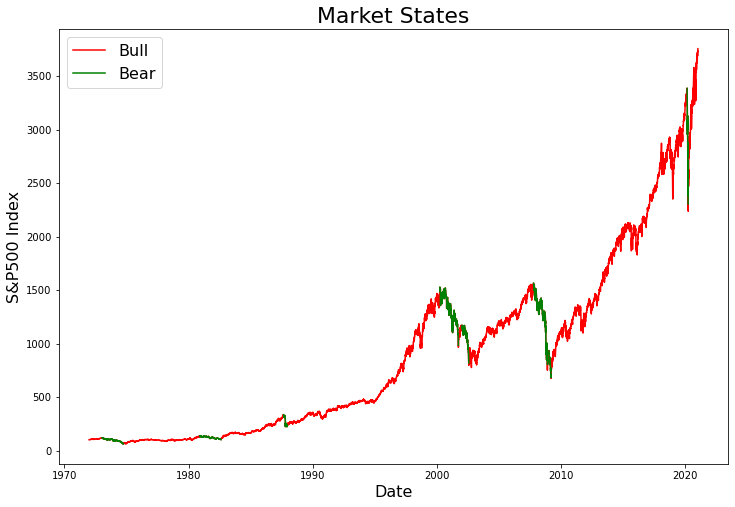

In [8]:
plt.figure(figsize=(12, 8))
plt.plot(sp500_p['Close'], 'r')
for x in bear:
    plt.plot(sp500_p['Close'].iloc[x[0]:x[1]], 'g')
    
plt.xlabel('Date', fontsize=16)
plt.ylabel('S&P500 Index', fontsize=16)
plt.title('Market States', fontsize=22)
plt.legend(['Bull', 'Bear'], fontsize=16)
plt.savefig('BullBear.png')

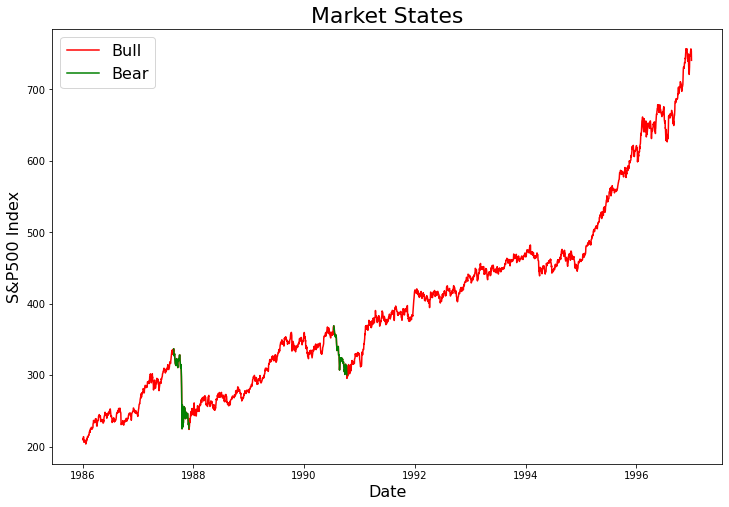

In [296]:
plt.figure(figsize=(12, 8))
plt.plot(sp500_p.loc['1986':'1996', 'Close'], 'r')
for x in bear:
    plt.plot(sp500_p.loc['1986':'1996', 'Close'].iloc[x[0]:x[1]], 'g')
    
plt.xlabel('Date', fontsize=16)
plt.ylabel('S&P500 Index', fontsize=16)
plt.title('Market States', fontsize=22)
plt.legend(['Bull', 'Bear'], fontsize=16)
plt.savefig('BullBear.png')

In [227]:
bear

[(416, 487), (1146, 487)]

In [9]:
history = 252*10

In [10]:
bull, bear

([(0, 259),
  (695, 2250),
  (2680, 3953),
  (4024, 7133),
  (7506, 7578),
  (7715, 9028),
  (9311, 9341),
  (9383, 12139)],
 [(259, 695),
  (2250, 2680),
  (3953, 4024),
  (7133, 7506),
  (7578, 7715),
  (9028, 9311),
  (9341, 9383),
  (12139, 12162)])

In [13]:
Tbull = np.array(list(map(lambda x: x[1]-x[0], bull)))
Tbear = np.array(list(map(lambda x: x[1]-x[0], bear)))

# Tbull = Tbull[Tbull>0]/252
# Tbear = Tbear[Tbear>0]/252

In [14]:
Tbull

array([ 259, 1555, 1273, 3109,   72, 1313,   30, 2756])

In [239]:
N1 = len(Tbull)
N2 = len(Tbear)

lmb1 = 1/np.mean(Tbull)
lmb2 = 1/np.mean(Tbear)

In [317]:
lmb1, lmb2

(0.7477744807121662, 1.2071856287425151)

In [627]:
rets = np.log(sp500_p['Close']/sp500_p['Close'].shift(1))
rets.dropna(inplace=True)

In [628]:
# (rets**2).sum()
rets

Date
1972-01-03   -0.004122
1972-01-04    0.004122
1972-01-05    0.009457
1972-01-06    0.004357
1972-01-07   -0.000387
                ...   
2020-12-24    0.003530
2020-12-28    0.008685
2020-12-29   -0.002230
2020-12-30    0.001341
2020-12-31    0.006418
Name: Close, Length: 12359, dtype: float64

In [220]:
def annVol(df, period=252):
#     T = df.shape[0]/period
#     vol = np.sqrt((df**2).sum()/T)
    vol = df.std()*np.sqrt(period)
    return vol

In [16]:
def annRet(df, period=252):
    T = df.shape[0]/period
    vol = annVol(df)
    ret = df.sum()/T + 0.5*vol**2
    
    return ret

In [303]:
bull

[(0, 58), (431, 503), (640, 1953), (2236, 2266), (2308, 5064)]

In [305]:
bullRets = []
for x in bull:
    bullRets.append(rets.iloc[x[0]:min(x[1], history)])


bullRets = pd.concat(bullRets)

In [309]:
bearRets = []
for x in bear[:4]:
    bearRets.append(rets.iloc[x[0]:min(x[1], history)])


bearRets = pd.concat(bearRets)

In [312]:
mu1 = annRet(bullRets)
mu2 = annRet(bearRets)

In [296]:
# Vbull = np.array(list(map(lambda x: annVol(rets.iloc[x[0]:min(x[1], history)]), bull)))
# Vbear = np.array(list(map(lambda x: annVol(rets.iloc[x[0]:min(x[1], history)]), bear[:4])))

In [297]:
# Rbull = np.array(list(map(lambda x: annRet(rets.iloc[x[0]:min(x[1], history)]), bull)))
# Rbear = np.array(list(map(lambda x: annRet(rets.iloc[x[0]:min(x[1], history)]), bear[:4])))

In [318]:
mu1, mu2

(0.26333665736898626, -0.5321959918413018)

In [319]:
sigma = annVol(rets)
sigma

0.19926081583203573

In [321]:
def compPara(df, lmb1=None, lmb2=None, mu1=None, mu2=None, sigma=None, periods=252, threshold_bull=0.2, threshold_bear=0.2):
    bull, bear = getTrend(df)
    
    n = df.shape[0]
#     ind = 1 if bull[-1][1] == n else 0
#     if ind == 1:
#         bull.pop(-1)
#     else:
#         bear.pop(-1)
        
    # lambda
    Tbull = np.array(list(map(lambda x: x[1]-x[0], bull))) / periods
    Tbear = np.array(list(map(lambda x: x[1]-x[0], bear))) / periods

    lmb1_new = 1/np.mean(Tbull)
    lmb2_new = 1/np.mean(Tbear)
    
    # mu
    bullRets = []
    for x in bull:
        bullRets.append(df.iloc[x[0]:x[1]])


    bullRets = pd.concat(bullRets)
    
    bearRets = []
    for x in bear:
        bearRets.append(df.iloc[x[0]:x[1]])

    bearRets = pd.concat(bearRets)
    
    mu1_new, mu2_new = annRet(bullRets), annRet(bearRets)
    sigma_new = annVol(df)
    
    N = len(bull) + len(bear)
    
#     if lmb1 != None:
#         lmb1 = update(lmb1, lmb1_new, N)
#         lmb2 = update(lmb2, lmb2_new, N)
#         mu1 = update(mu1, mu1_new, N)
#         mu2 = update(mu2, mu2_new, N)
#         sigma = update(sigma, sigma_new, N)
#     else:
    lmb1, lmb2, mu1, mu2, sigma = lmb1_new, lmb2_new, mu1_new, mu2_new, sigma_new
    
    
    return lmb1, lmb2, mu1, mu2, sigma

In [147]:
def update(old, new, N):
    
    return (1-2/N)*old + 2/N*new

In [315]:
lmb1, lmb2, mu1, mu2, sigma = compPara(rets['1972':'1981'])
lmb1, lmb2, mu1, mu2, sigma

(0.917698470502549,
 1.1506849315068493,
 0.2772588389341945,
 -0.3184728320729699,
 0.14028944772081162)

In [316]:
rho = 0.0679
alpha = theta = 0.001

In [633]:
# mu1, mu2 = 0.18, -0.77
# lmb1, lmb2 = 0.36, 2.53
# sigma = 0.184
# rho = 0.0679
# alpha = theta = 0.001

In [104]:
I = 2000
N = rets['1982'].shape[0]

In [105]:
I, N

(2000, 253)

In [69]:
def FDM(mu1, mu2, lmb1, lmb2, sigma, rho, alpha, theta, N, I):
    
    h = lambda x: 0.5*((mu1-mu2)*x*(1-x)/sigma)**2
    k = lambda x: -(lmb1+lmb2)*x + lmb2
    f = lambda x: (mu1-mu2)*x + mu2 - 0.5*sigma**2 - rho
    
    dt = 1/N
    dp = 1/I
    
    Z_grid = np.zeros((I+1, N+1))
    
    # Boundary Condition
    sr = np.log(1-alpha)
    br = np.log(1+theta)
    Z_grid[0, :] = sr
    Z_grid[I, :] = br
    
    # Terminal Condition
    Z_grid[:, N] = np.log(1-alpha)
  
    p = np.linspace(0, 1, I+1)
    
    cur_h = h(p)[1:-1]
    cur_k = k(p)[1:-1]

    for n in range(N-1, -1, -1):

        # Set up coeff metric
        indicator = (cur_k>=0)

        a = -dt*cur_h/(dp**2) + (~indicator)*dt*cur_k/dp
        b = 1 + 2*dt*cur_h/(dp**2) + (2*indicator-1)*dt*cur_k/dp
        c = -dt*cur_h/(dp**2) - indicator*dt*cur_k/dp

        mb = np.diag(b, k=0)
        ma = np.diag(a[1:], k=-1)
        mc = np.diag(c[:-1], k=1)
        coeffm = ma + mb + mc

        Znp1 = Z_grid[1:I, n+1]
        Fn = dt*f(p)[1:-1]
        Fn[0] -= a[0]*Z_grid[0, n]
        Fn[-1] -= c[-1]*Z_grid[I, n]
        
        Znp1 = Znp1 + Fn
        Zn = np.linalg.solve(coeffm, Znp1)
        Zn[Zn<=sr] = sr
        Zn[Zn>=br] = br
        Z_grid[1:I, n] = Zn
        
    
    return Z_grid

In [177]:
Z = FDM(mu1, mu2, lmb1, lmb2, sigma, rho, alpha, theta, N, I)

In [178]:
p0 = (rho-mu2+0.5*sigma**2) / (mu1-mu2)
p0

0.872089946483041

In [134]:
def getBarrier(Z, I, N):
    p = np.linspace(0, 1, I+1)
    t = np.linspace(0, 1, N+1)

    br = np.log(1+theta)
    sr = np.log(1-alpha)

    ps = []
    pb = []

    for i in range(Z.shape[1]-1):
        idx1 = np.argmin(Z[:, i]<=sr)
        idx2 = np.argmax(Z[:, i]>=br)

        ps.append(p[idx1])
        pb.append(p[idx2])
        
    return ps, pb

In [181]:
ps, pb = getBarrier(Z, I, N)

In [179]:
p = np.linspace(0, 1, I+1)
t = np.linspace(0, 1, N+1)

br = np.log(1+theta)
sr = np.log(1-alpha)

ps = []
pb = []

for i in range(Z.shape[1]-1):
    idx1 = np.argmin(Z[:, i]<=sr)
    idx2 = np.argmax(Z[:, i]>=br)
    
    ps.append(p[idx1])
    pb.append(p[idx2])

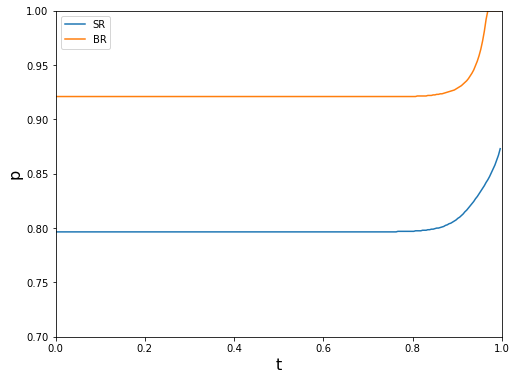

In [182]:
plt.figure(figsize=(8, 6))
plt.plot(t[:-1], ps, label='SR')
plt.plot(t[:-1], pb, label='BR')
plt.xlabel('t', fontsize=16)
plt.ylabel('p', fontsize=16)
plt.xlim([0, 1])
plt.ylim([0.7, 1])
plt.legend()
plt.savefig('ConditionalProb.png')

In [111]:
pb = np.array(pb)
ps = np.array(ps)

In [112]:
pb[0], ps[0]

(0.921, 0.7965)

In [113]:
St = sp500_p['Close'].shift(1)
Stp1 = sp500_p['Close']

In [114]:
rets = np.log(Stp1/St)

In [115]:
rets

Date
1971-12-31         NaN
1972-01-03   -0.004122
1972-01-04    0.004122
1972-01-05    0.009457
1972-01-06    0.004357
                ...   
2020-12-24    0.003530
2020-12-28    0.008685
2020-12-29   -0.002230
2020-12-30    0.001341
2020-12-31    0.006418
Name: Close, Length: 12360, dtype: float64

In [116]:
rets.dropna(inplace=True)

In [117]:
rets['1972':'1982'].add(1).cumprod()

Date
1972-01-03    0.995878
1972-01-04    0.999983
1972-01-05    1.009439
1972-01-06    1.013837
1972-01-07    1.013446
                ...   
1982-12-27    1.241430
1982-12-28    1.229144
1982-12-29    1.233241
1982-12-30    1.225270
1982-12-31    1.227974
Name: Close, Length: 2778, dtype: float64

In [37]:
# compPara(rets['1972':'1982'], periods=252)
compPara(rets['2010':'2020'], periods=252)

<ipython-input-15-fa677af1e29e>:3: RuntimeWarning: invalid value encountered in double_scalars
  vol = np.sqrt((df**2).sum()/T)
<ipython-input-16-922f4bb5fd80>:4: RuntimeWarning: invalid value encountered in double_scalars
  ret = df.sum()/T + 0.5*vol**2


(0.14896551724137932,
 -0.1994459833795014,
 0.12348748804619523,
 nan,
 0.17573645029651971)

In [29]:
Tclass, bull, bear = getTrend(rets['1972':'1982'].add(1).cumprod(), threshold_bull, threshold_bull)

In [31]:
bear, bull

([(258, 694), (2249, 2679)], [(0, 258), (694, 2249)])

In [33]:
periods = 252
Tbull = np.array(list(map(lambda x: x[1]-x[0], bull))) / periods
Tbear = np.array(list(map(lambda x: x[1]-x[0], bear))) / periods

lmb1 = 1/np.mean(Tbull)
lmb2 = 1/np.mean(Tbear)

In [35]:
lmb2

0.581986143187067

In [54]:
mu1, mu2 = 0.143, -0.510
lmb1, lmb2 = 0.2, 0.706
sigma = 0.219
rho = 0.035
alpha = theta = 0.001

In [161]:
def pt(rets, mu1, mu2, lmb1, lmb2, sigma, rho, alpha, theta, periods=252):
    
    n = rets.shape[0]
    dt = 1/periods
    p = np.zeros(n)
    p[0] = (rho-mu2+0.5*sigma**2) / (mu1-mu2)
    g = lambda x: -(lmb1+lmb2)*x + lmb2 - (mu1-mu2)*x*(1-x)*((mu1-mu2)*x+mu2-0.5*sigma**2)/sigma**2
    
    for i in range(n-1):
        p[i+1] = min(max(p[i] + g(p[i])*dt + rets[i]*(mu1-mu2)*p[i]*(1-p[i])/sigma**2, 0), 1)
        
    return p

In [28]:
(rho-mu2+0.5*sigma**2) / (mu1-mu2)

0.871333078101072

In [392]:
pi = 0.2
pi + g(pi)*dt + -0.01*(mu1-mu2)*pi*(1-pi)/sigma**2

0.16436790926275993

In [119]:
p = pt(rets['1982'])

In [334]:
rets['2011':'2021'].shape

(2517,)

In [335]:
len(ps)

2517

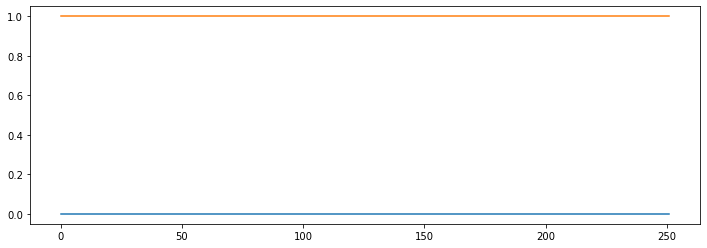

In [219]:
plt.figure(figsize=(12, 4))
# plt.figure(figsize=(8, 6))
plt.plot(ps, label='SR')
plt.plot(pb, label='BR')
# plt.xlabel('t', fontsize=16)
# plt.ylabel('p', fontsize=16)
# plt.xlim([0, 1])
# plt.ylim([0.7, 1]);
plt.plot(p);

In [121]:
# tf_rets = rets['2011':'2021'].copy()
tf_rets = rets['1982'].copy()

In [356]:
daily = ((rho+1)**(1/252) - 1) # ((1+daily/252)**252 - 1)
# ((1+rho/252)**252 - 1)
daily

6.533438035116745e-05

In [357]:
df2 = pd.DataFrame(np.repeat(daily, 252))
df2

,0
0,0.000065
1,0.000065
2,0.000065
3,0.000065
4,0.000065
...,...
247,0.000065
248,0.000065
249,0.000065
250,0.000065


In [358]:
df2.add(1).prod() - 1

0    0.0166
dtype: float64

In [122]:
pos = 0
for i in range(tf_rets.shape[0]):
    if pos == 0:
        if p[i] >= pb[0]:
            pos = 1
        else:
            tf_rets[i] = 0
    elif pos == 1:
        if p[i] <= ps[0]:
            pos = 0
            tf_rets[i] = 0
        else:
            pass
        


In [364]:
tf_rets[(p<pb) & (p>ps)] = 0
tf_rets[(p<ps)] = -tf_rets[(p<ps)]


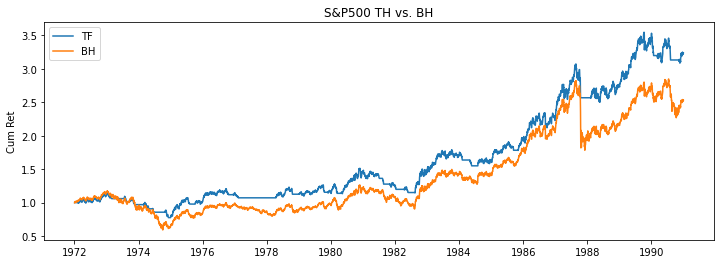

In [650]:
plt.figure(figsize=(12, 4))
plt.plot((tf_rets[:'1990']+1).cumprod(), label='TF')
plt.plot((rets[:'1990']+1).cumprod(), label='BH')
plt.legend()
plt.ylabel('Cum Ret')
plt.title('S&P500 TH vs. BH')
plt.savefig('S&P500_TH.png')

In [191]:
rets['1982':'1992']

Date
1982-01-04    0.001549
1982-01-05   -0.022160
1982-01-06   -0.007273
1982-01-07   -0.002100
1982-01-08    0.005200
                ...   
1992-12-24    0.001684
1992-12-28   -0.001411
1992-12-29   -0.002668
1992-12-30    0.001916
1992-12-31   -0.007112
Name: Close, Length: 2782, dtype: float64

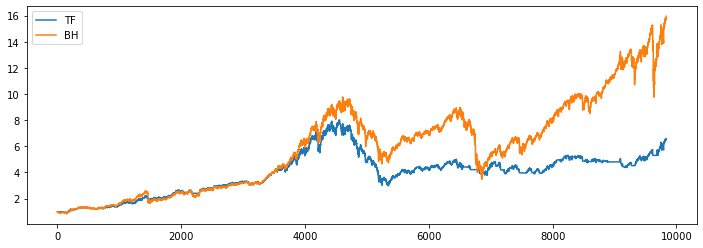

In [320]:
plt.figure(figsize=(12, 4))
plt.plot((r+1).cumprod(), label='TF')
plt.plot((rets['1982':'2021']+1).cumprod().values, label='BH')
plt.legend();

In [127]:
rf = pd.read_csv('10-year-treasury-bond-rate-yield-chart.csv', parse_dates=[0], index_col=0)
rf.dropna(inplace=True)

DatetimeIndex(['1962-02-01', '1962-03-01', '1962-04-01', '1962-05-01',
               '1962-08-01', '1962-09-01', '1962-10-01', '1962-11-01',
               '1962-12-01', '1962-01-15',
               ...
               '2021-09-06', '2021-10-06', '2021-11-06', '2021-06-14',
               '2021-06-15', '2021-06-16', '2021-06-17', '2021-06-18',
               '2021-06-21', '2021-06-22'],
              dtype='datetime64[ns]', name='date', length=14872, freq=None)

In [133]:
rf.loc['1982'].mean()/100

 value    0.130055
dtype: float64

In [137]:
def getPerformance(df, p, ps, pb):
    tf_rets = df.reset_index(drop=True).copy()
    pos = 0
    for i in range(tf_rets.shape[0]):
        if pos == 0:
            if p[i] >= pb[i]:
                pos = 1
            else:
                tf_rets[i] = 0
        elif pos == 1:
            if p[i] <= ps[i]:
                pos = 0
                tf_rets[i] = 0
            else:
                pass
            
    return tf_rets

In [322]:
start = 1982
end = 2021
rho = 0.01
alpha = theta = 0.001
I = 2000

tf_rets_comb = []
lmb1, lmb2, mu1, mu2, sigma = compPara(rets[str(start-10):str(start-1)])
for year in range(start, end):
    strYear = str(year)
    print(strYear)
#     rho = rf.loc[strYear].mean()[0]/100
    lmb1, lmb2, mu1, mu2, sigma = compPara(rets[str(year-10):str(year-1)], lmb1, lmb2, mu1, mu2, sigma)
    
    print(mu1, mu2, lmb1, lmb2, sigma)
    N = rets[strYear].shape[0]
    Z = FDM(mu1, mu2, lmb1, lmb2, sigma, rho, alpha, theta, N, I)
    
    ps, pb = getBarrier(Z, I, N)
    
    p = pt(rets[strYear], mu1, mu2, lmb1, lmb2, sigma, rho, alpha, theta)
    
    tf_rets = getPerformance(rets[strYear], p, ps, pb)
    tf_rets_comb.append(tf_rets)
    

1982
0.2772588389341945 -0.3184728320729699 0.917698470502549 1.1506849315068493 0.14028944772081162
1983
0.26493544169803074 -0.25280658117968247 0.8644939965694682 0.7987321711568939 0.14945445059405807
1984
0.264059222198385 -0.2672331832237379 0.8689655172413792 0.9921259842519685 0.14694980998706084
1985
0.3729672689798498 -0.24076780561279948 1.161290322580645 1.357271095152603 0.13567204894282348
1986
0.34690395376207606 -0.218490011284401 1.1527904849039339 1.177570093457944 0.13062845622222197
1987
0.3694630538532051 -0.2371492148907754 1.106476399560922 1.2612612612612613 0.1341783641836205
1988
0.2476239970510435 -0.2776720154510154 0.3906976744186046 1.502982107355865 0.16884812672088184
1989
0.26278787280549026 -0.3878573860923278 0.43800695249130944 1.423728813559322 0.1728121298733931
1990
0.2774067086266908 -0.3268506368167413 0.3492723492723493 1.3475935828877006 0.1744228441057685
1991
0.23004327498510285 -0.3321746565675227 0.390899689762151 1.0588235294117647 0.1739

In [318]:
r = pd.concat(tf_rets_comb, ignore_index=True)

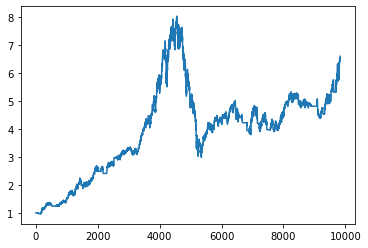

In [319]:
plt.figure()
plt.plot(r.add(1).cumprod())

In [378]:
from itertools import groupby

In [399]:
bear = []
bull = []
i = 0
for k, g in groupby(decision):
    
    n = len(list(g))
    if k == 0:
        bear.append((i, i+n))
    elif k == 1:
        bull.append((i, i+n))
    i = i + n
#     print(k, len(list(g)))
#     print(i)

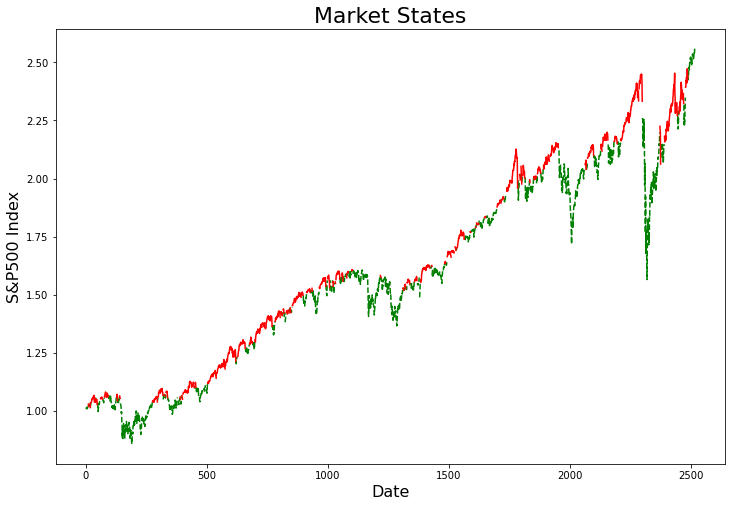

In [401]:
plt.figure(figsize=(12, 8))
# plt.plot((rets['2011':'2021']+1).cumprod().values, 'r')
for x in bear:
    plt.plot(np.arange(x[0], x[1]), (rets['2011':'2021']+1).cumprod().iloc[x[0]:x[1]], 'g--')

for x in bull:
    plt.plot(np.arange(x[0], x[1]), (rets['2011':'2021']+1).cumprod().iloc[x[0]:x[1]], 'r')

plt.xlabel('Date', fontsize=16)
plt.ylabel('S&P500 Index', fontsize=16)
plt.title('Market States', fontsize=22)
# plt.legend(['Bull', 'Bear'], fontsize=16)
plt.savefig('BullBear.png')

<AxesSubplot:xlabel='Date'>

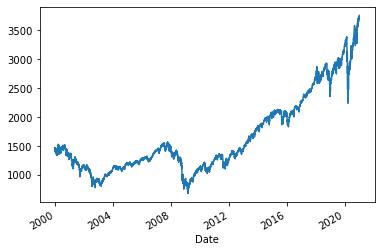

In [366]:
sp500_p['Close'].plot()

In [76]:
wholeBars = pd.read_csv('1minBars_SAWAD.csv', index_col=0, parse_dates=[0])
wholeBars

,volume,high,low,close,vwap
time,,,,,
2020-11-02 03:00:00,10100,49.75,49.50,49.75,49.563918
2020-11-02 03:01:00,30500,49.75,49.50,49.50,49.585695
2020-11-02 03:02:00,100,49.75,49.75,49.75,49.590331
2020-11-02 03:03:00,100,49.50,49.50,49.50,49.590262
2020-11-02 03:04:00,33500,49.75,49.50,49.75,49.579516
...,...,...,...,...,...
2021-06-09 09:25:00,500,75.00,74.75,74.75,74.618766
2021-06-09 09:26:00,113100,74.75,74.75,74.75,74.621928
2021-06-09 09:27:00,900,74.75,74.75,74.75,74.623198


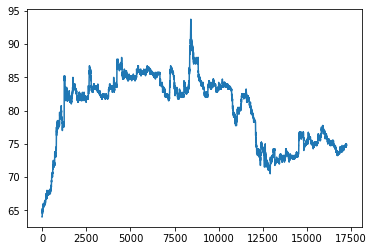

In [133]:
plt.figure()
plt.plot(wholeBars.loc['2021-03':, 'close'].values)

In [446]:
wholeBars['rets'] = np.log(wholeBars['close']/wholeBars['close'].shift(1))

In [447]:
wholeBars.dropna(inplace=True)

In [665]:
Tclass, bull, bear = getTrend(pd.DataFrame(wholeBars['close'].values), 0.035, 0.035)

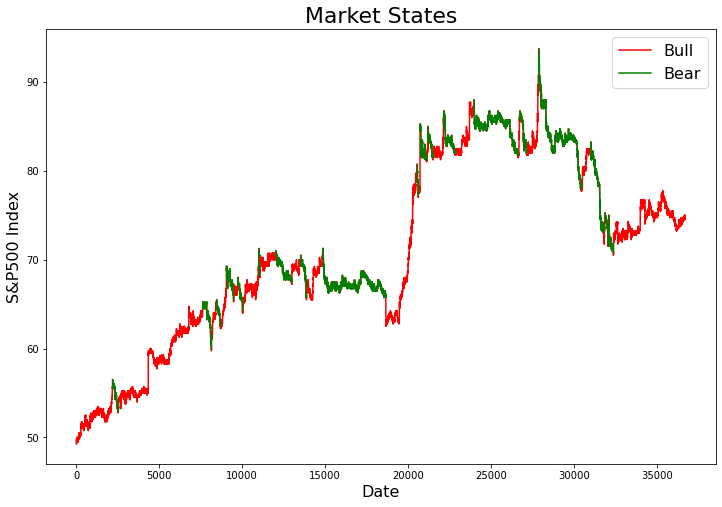

In [449]:
plt.figure(figsize=(12, 8))
plt.plot(wholeBars['close'].values, 'r')
for x in bear:
    plt.plot(np.arange(x[0], x[1]), wholeBars['close'].iloc[x[0]:x[1]], 'g')
    
plt.xlabel('Date', fontsize=16)
plt.ylabel('S&P500 Index', fontsize=16)
plt.title('Market States', fontsize=22)
plt.legend(['Bull', 'Bear'], fontsize=16)
plt.savefig('BullBear.png')

In [664]:
history = 20000

In [506]:
Tbull = np.array(list(map(lambda x: min(x[1], history)-x[0], bull)))
Tbear = np.array(list(map(lambda x: min(x[1], history)-x[0], bear)))

Tbull = Tbull[Tbull>0]/(271*5)
Tbear = Tbear[Tbear>0]/(271*5)

In [507]:
N1 = len(Tbull)
N2 = len(Tbear)

lmb1 = 1/np.mean(Tbull)
lmb2 = 1/np.mean(Tbear)

In [508]:
lmb1, lmb2

(0.9909580480021274, 1.882467352042234)

In [656]:
rets = wholeBars['rets'].copy()

In [657]:
rets.reset_index(drop=True, inplace=True)

In [658]:
bullRets = []
for x in bull:
    bullRets.append(rets.iloc[x[0]:min(x[1], history)])


bullRets = pd.concat(bullRets)

In [659]:
bearRets = []
for x in bear:
    bearRets.append(rets.iloc[x[0]:min(x[1], history)])


bearRets = pd.concat(bearRets)

In [660]:
mu1 = annRet(bullRets, 271*5)
mu2 = annRet(bearRets, 271*5)

In [661]:
mu1, mu2

(0.04196254995032938, 0.022646397266463725)

In [662]:
sigma = annVol(rets[:history], 271*5)
sigma

0.09365876076318519

In [663]:
# rho = (0.015+1)**(1/52)-1
alpha = theta = 0.0035
rho = 0

In [475]:
rets[history:].shape

(16711,)

In [510]:
N = 16711
I = 1000

In [565]:
Z = FDM(mu1, mu2, lmb1, lmb2, sigma, rho, alpha, theta, N, I)

In [566]:
br = np.log(1+theta)
sr = np.log(1-alpha)

ps = []
pb = []

for i in range(Z.shape[1]-1):
    idx1 = np.argmin(Z[:, i]<=sr)
    idx2 = np.argmax(Z[:, i]>=br)
    
    ps.append(p[idx1])
    pb.append(p[idx2])

In [567]:
p = np.linspace(0, 1, I+1)
t = np.linspace(0, 1, N+1)

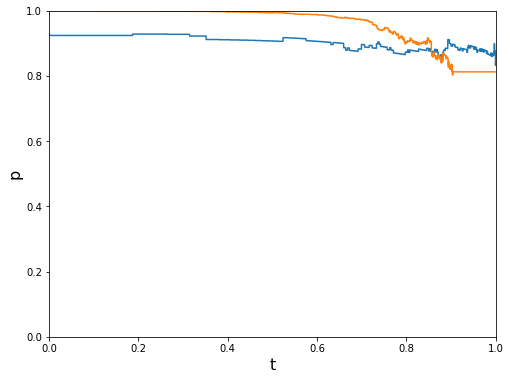

In [568]:
plt.figure(figsize=(8, 6))
plt.plot(t[:-1], ps, label='SR')
plt.plot(t[:-1], pb, label='BR')
plt.xlabel('t', fontsize=16)
plt.ylabel('p', fontsize=16)
plt.xlim([0, 1])
plt.ylim([0, 1]);

In [624]:
p = pt(rets[history:].reset_index(drop=True), 271*5)

In [625]:
p

array([0.89981895, 0.89964018, 0.89946191, ..., 0.89350182, 0.89334131,
       0.89318128])

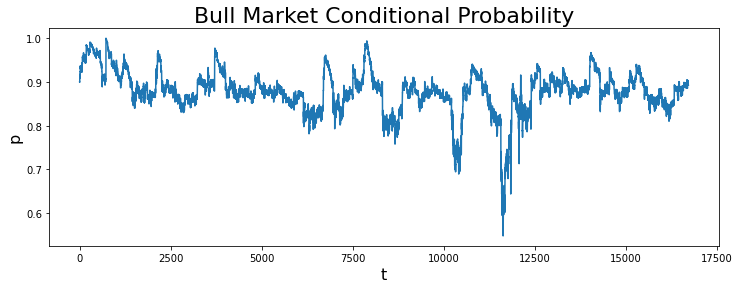

In [626]:
plt.figure(figsize=(12, 4))
# plt.figure(figsize=(8, 6))
# plt.plot(ps, label='SR')
# plt.plot(pb, label='BR')
plt.xlabel('t', fontsize=16)
plt.ylabel('p', fontsize=16)
# plt.xlim([0, 1])
# plt.ylim([0.7, 1]);
plt.plot(p)
plt.title('Bull Market Conditional Probability', fontsize=22)
plt.savefig('SAWAD_bullProd.png')

In [594]:
tf_rets = rets[history:].reset_index(drop=True).copy()

In [595]:
pos = 0
for i in range(tf_rets.shape[0]):
    if pos == 0:
        if p[i] >= 0.73:
            pos = 1
        else:
            tf_rets[i] = 0
    elif pos == 1:
        if p[i] <= 0.6:
            pos = 0
            tf_rets[i] = 0
        else:
            pass
        


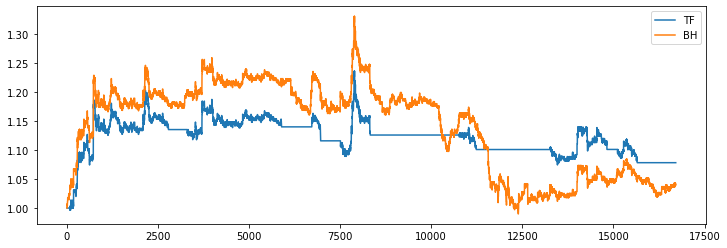

In [622]:
plt.figure(figsize=(12, 4))
plt.plot((tf_rets+1).cumprod(), label='TF')
plt.plot((rets[history:]+1).cumprod().reset_index(drop=True), label='BH')
plt.legend()
plt.savefig('SAWAD_TF.png')